# Лабораторная работа 6. Файлы.

Файл (англ. File) - именованная область данных на носителе информации.

Файлы хранятся в файловой системе - каталоге, определяющим способ организации, хранения и именования данных, а также задающем ограничения на формат и доступ к данным. Обычно организовано как древовидные каталоги.

Файлы используются программами для долговременного хранения информации, как необходимой для собственной работы (например, настройки), так и полученной во время ее исполнения (результаты вычислений и т.д.). 

Работа с файлами осуществляется с помощью специальных типов переменных - абстрактных файловых объектах, они могут быть привязан как к физическому файлу на диске, или другому устройству, поддерживающему схожие операции (стандартный ввод/вывод и пр.).

Все файлы можно разделить на две большие группы:
- текстовые (обычно .txt), рассматриваются как содержащие символьные данные, строки и т.д. (допускают представленние в виде строк типа str, при этом происходит автоматическое кодирование/декодирование символов Unicode а также соответствующим образом обрабатывается символ конца строки);
- бинарные (байтовые, обычно .bin),  рассматриваются как последовательность байтов (файлы изображений и т.д.), представленные в виде строк типа bytes, такие строки при записи в файл передаются без дополнительной обработки, так же и при чтении.

Файловые объекты обычно создаются с помощью функци open(), которая принимает имя файла, с соответствующем модификатором доступа:
- 'r' - открыть для чтения (по умолчанию),
- 'w' - открыть для записи (если файл существует, то очищается),
- 'x' - открыть для создания с эксклюзивными правами (ошибка, если файл существует),
- 'a' - открыть для добавления (если файл существует),
- '+' - открыть для чтения и записи,
- 't' - текстовый режим (по умолчанию),
- 'b' - двоичный режим.

Функция open также принимает необязательный третий аргумент с размером буфера, позволяющий управлять буферизацией файла –
способом размещения данных в очереди, позволяющим повысить производительность. Значение 0 в этом аргументе означает отсут-
ствие буферизации (данные передаются немедленно, но это значение допустимо только для двоичных режимов), значение 1 означает по-
строчную буферизацию, а любое другое положительное число означает использование режима полной буферизации (который исполь-
зуется по умолчанию, если третий аргумент отсутствует в вызове функции).

In [13]:
name_file = "data1.txt"

In [14]:
f1 = open("data1.txt")

In [18]:
f1.read(1)

''

In [15]:
f1.readline()

'При работе с файлами всегда целесообразно использовать обработку ошибок.'

In [28]:
f1.close()

In [27]:
f1 = open("data1.txt",'a')
f1.write("\nПонятно")
f1.close()

8

In [21]:
f1 = open("data1.txt")
print(f1.read())
f1.close()

При работе с файлами всегда целесообразно использовать обработку ошибок.
Понятно


# Обработка ошибок при работе с файлами

При открытии файла или в процессе работы с ним мы можем столкнуться с различными исключениями, например, к нему нет доступа и т.д. В этом случае программа выпадет в ошибку, а ее выполнение не дойдет до вызова метода close, и соответственно файл не будет закрыт.

Можно написать конструкцию для обработки ошибок try/finally, которая гарантирует, что если после открытия файла операции с ним приводят к исключениям, он закроется автоматически:

In [25]:
try:
    f1 = open("data1.txt")
    print('файл открыл.')    
    try:
        print(f1.read())
    except:
        print('ошибка работы с файлом!!!')
    finally:
        f1.close()
        print('файл закрыт.')
except:
    print('неудалось открыть файл!!!')

файл открыл.
При работе с файлами всегда целесообразно использовать обработку ошибок.
Понятно
файл закрыт.


Еще один подход — использовать инструкцию with, которая упрощает обработку исключений с помощью инкапсуляции начальных операций, а также задач по закрытию и очистке. 

Эта конструкция определяет для открытого файла переменную и выполняет набор инструкций. После их выполнения файл автоматически закрывается. Даже если при выполнении инструкций в блоке with возникнут какие-либо исключения, то файл все равно закрывается. Однако, обработка ошибок в самом блоке инструкций не производится.

In [26]:
with open('data1.txt') as f1:
    print(f1.read())

При работе с файлами всегда целесообразно использовать обработку ошибок.
Понятно


# Различные способы чтения текстового файла целиком:

1. Чтение из файла (в одну строку)

In [100]:
with open("data2.txt") as f:
    data = f.read()
    print(data)

Когда дети будут смотреть на великих учёных так же,
как они смотрят на знаменитых актёров и музыкантов,
человечество совершит большой прорыв.

Брайан Грин
https://ru.wikipedia.org/wiki/Грин,_Брайан_Рэндолф


2. Чтение из файла (в список)

In [102]:
with open("data2.txt") as f:
    data = f.readlines()
    print(data)

['Когда дети будут смотреть на великих учёных так же,\n', 'как они смотрят на знаменитых актёров и музыкантов,\n', 'человечество совершит большой прорыв.\n', '\n', 'Брайан Грин\n', 'https://ru.wikipedia.org/wiki/Грин,_Брайан_Рэндолф']


3. Чтение из файла (построчно)

In [103]:
with open("data2.txt") as f:
    for line in f:
        print(line.strip())

Когда дети будут смотреть на великих учёных так же,
как они смотрят на знаменитых актёров и музыкантов,
человечество совершит большой прорыв.

Брайан Грин
https://ru.wikipedia.org/wiki/Грин,_Брайан_Рэндолф


Объект файлового типа относится к итерируемым. Из таких объектов происходит последовательное извлечение элементов. Поэтому считывать данные из них можно сразу в цикле без использования методов чтения:

In [149]:
for i in open('data2.txt'):
    print(i, end='')

Когда дети будут смотреть на великих учёных так же,
как они смотрят на знаменитых актёров и музыкантов,
человечество совершит большой прорыв.

Брайан Грин
https://ru.wikipedia.org/wiki/Грин,_Брайан_Рэндолф

# Перенаправление ввода/вывода.

Когда выполняются операции стандартного ввода/вывода данных используются входные и выходные потоки данных stdin и stdout.
Все эти потоки имеют некоторое сходство с файловыми объектами. Например, поток stdout поддерживают метод write(), предназначенный для вывода сообщений, а поток stdin — метод readline(), служащий для получения вводимых пользователем данных. Если этим потокам присвоить ссылку на объект, поддерживающий файловые методы, то можно перенаправить стандартные потоки в соответствующий файл.

Управлять потоками ввода и вывода можно с помощью библиотеки sys.

Рассмотрим примеры перенаправления потоков:

In [29]:
import sys

In [30]:
tmp_out = sys.stdout                   # Сохраняем ссылку на sys.stdout
f = open("file_out.txt", "a" )         # Открываем файл на дозапись
sys.stdout = f                         # Перенаправляем вывод в файл
print("Пишем строку в файл")
sys.stdout = tmp_out                   # Восстанавливаем стандартный вывод
print("Пишем строку в стандартный вывод")
f.close()                              # Закрываем файл

Пишем строку в стандартный вывод


Функция print() напрямую поддерживает перенаправление вывода. Для этого используется параметр file , который по умолчанию ссылается на стандартный поток вывода. 

Например, записать строку в файл можно так:

In [31]:
f = open("file_out.txt", "a")
print("Пишем строку в файл", file = f)
f.close()

Стандартный ввод stdin также можно перенаправить. В этом случае функция input() будет читать одну строку из файла при каждом вызове. При достижении конца файла возбуждается исключение EOFError. Для примера выведем содержимое файла с помощью перенаправления потока ввода

In [4]:
tmp_in = sys.stdin               # Сохраняем ссылку на sys.stdin
f = open("file_out.txt", "r")    # Открываем файл на чтение
sys.stdin = f                    # Перенаправляем ввод
sys.stdin.isatty()

#while True:
    try:
        line = input()           # Считываем строку из файла
        print(line)              # Выводим строку
    except EOFError:             # Если достигнут конец файла,
        break                    # выходим из цикла

sys.stdin = tmp_in               # Восстанавливаем стандартный ввод
f.close()                        # Закрываем файл
input()

IndentationError: unexpected indent (<ipython-input-4-dab4443d14e2>, line 7)

In [7]:
tmp_in = sys.stdin               # Сохраняем ссылку на sys.stdin

with open("file_out.txt") as f:  # Открываем файл на чтение
    sys.stdin = f                # Перенаправляем ввод
    inFile = sys.stdin.isatty()
    print(inFile)
    try:
        line = input()           # Считываем строку из файла
        print(line)              # Выводим строку
    except:                     # Если достигнут конец файла,
        break                    # выходим из цикла

    sys.stdin = tmp_in           # Восстанавливаем стандартный ввод
    f.close()                    # Закрываем файл
#input()

SyntaxError: 'break' outside loop (<ipython-input-7-bb286574c977>, line 14)

# Бинарные файлы и сериализация

Чтение/запись простых типов (например, чисел или строк) не представляет большого труда, однако с увеличением объема информации появляется необходимость эффективно сохранять/загружать более сложные структуры данных (например, словари). Кроме того, модульная архитектура современного программного обеспечения приводит к необходимости обмена данными между различными модулями, а также между приложениями в целом, для чего необходимо иметь возможность удобно обмениваться данными.

Сериализация — процесс перевода какой-либо структуры данных в последовательность битов. Десериализация — обратный процесс.

Чаще всего сериализация используется для сохранения объектов в файлы или передачи их по сети.

# Запись строк в бинарный файл.

In [32]:
# Текстовый режим

with open(r"data2.txt") as f:
    data = f.read()
    
print(type(data))    
data

<class 'str'>


'Когда дети будут смотреть на великих учёных так же,\nкак они смотрят на знаменитых актёров и музыкантов,\nчеловечество совершит большой прорыв.\n\nБрайан Грин\nhttps://ru.wikipedia.org/wiki/Грин,_Брайан_Рэндолф'

In [33]:
# Бинарный режим
with open(r"data2.bin", "wb") as f:
    f.write (bytes(data, "cp1251"))

In [34]:
text = data
del data

In [35]:
with open(r"data2.bin") as f:
    data = f.read()

print(type(data))    
data

<class 'str'>


'Когда дети будут смотреть на великих учёных так же,\nкак они смотрят на знаменитых актёров и музыкантов,\nчеловечество совершит большой прорыв.\n\nБрайан Грин\nhttps://ru.wikipedia.org/wiki/Грин,_Брайан_Рэндолф'

In [36]:
print(data)

Когда дети будут смотреть на великих учёных так же,
как они смотрят на знаменитых актёров и музыкантов,
человечество совершит большой прорыв.

Брайан Грин
https://ru.wikipedia.org/wiki/Грин,_Брайан_Рэндолф


In [39]:
with open('data2.bin', 'wb') as f:
    f.write(text.encode('utf-8'))

In [40]:
with open('data2.bin', 'rb') as f:
    data = f.read()
data

b'\xd0\x9a\xd0\xbe\xd0\xb3\xd0\xb4\xd0\xb0 \xd0\xb4\xd0\xb5\xd1\x82\xd0\xb8 \xd0\xb1\xd1\x83\xd0\xb4\xd1\x83\xd1\x82 \xd1\x81\xd0\xbc\xd0\xbe\xd1\x82\xd1\x80\xd0\xb5\xd1\x82\xd1\x8c \xd0\xbd\xd0\xb0 \xd0\xb2\xd0\xb5\xd0\xbb\xd0\xb8\xd0\xba\xd0\xb8\xd1\x85 \xd1\x83\xd1\x87\xd1\x91\xd0\xbd\xd1\x8b\xd1\x85 \xd1\x82\xd0\xb0\xd0\xba \xd0\xb6\xd0\xb5,\n\xd0\xba\xd0\xb0\xd0\xba \xd0\xbe\xd0\xbd\xd0\xb8 \xd1\x81\xd0\xbc\xd0\xbe\xd1\x82\xd1\x80\xd1\x8f\xd1\x82 \xd0\xbd\xd0\xb0 \xd0\xb7\xd0\xbd\xd0\xb0\xd0\xbc\xd0\xb5\xd0\xbd\xd0\xb8\xd1\x82\xd1\x8b\xd1\x85 \xd0\xb0\xd0\xba\xd1\x82\xd1\x91\xd1\x80\xd0\xbe\xd0\xb2 \xd0\xb8 \xd0\xbc\xd1\x83\xd0\xb7\xd1\x8b\xd0\xba\xd0\xb0\xd0\xbd\xd1\x82\xd0\xbe\xd0\xb2,\n\xd1\x87\xd0\xb5\xd0\xbb\xd0\xbe\xd0\xb2\xd0\xb5\xd1\x87\xd0\xb5\xd1\x81\xd1\x82\xd0\xb2\xd0\xbe \xd1\x81\xd0\xbe\xd0\xb2\xd0\xb5\xd1\x80\xd1\x88\xd0\xb8\xd1\x82 \xd0\xb1\xd0\xbe\xd0\xbb\xd1\x8c\xd1\x88\xd0\xbe\xd0\xb9 \xd0\xbf\xd1\x80\xd0\xbe\xd1\x80\xd1\x8b\xd0\xb2.\n\n\xd0\x91\xd1\x80\xd0\xb0\

In [41]:
print(data.decode('utf-8'))

Когда дети будут смотреть на великих учёных так же,
как они смотрят на знаменитых актёров и музыкантов,
человечество совершит большой прорыв.

Брайан Грин
https://ru.wikipedia.org/wiki/Грин,_Брайан_Рэндолф


На практике записывать символы в бинарный файл не целесообразно, так как это не приносит ощутимых изменений в размере файла и скорости работы с ним.

Если вам когда либо потребуется прочесть текст или записать его в бинарный файл, убедитесь, что не забыли декодировать или закодировать соответствующую информацию.

Обычно для кодировки символов используется кодировка UTF-8 (Unicode Transformation Format, 8-bit — «формат преобразования Юникода, 8-бит»), допускающая задания 1 112 064 символа (https://unicode-table.com/ru/#cjk-unified-ideographs).

Однако, это не единственный вариант. В частности, могут использоваться:
- Unicode Transformation Format, по N бит на каждый символ: UTF-8, UTF-16, UTF-32.
- Universal Character Set, по N байт на каждый символ: UCS-2, UCS-4.

Если кодировка использует более одного байта, то закодированный текст может также содержать BOM — маркер последовательности байтов, U+FEFF.

Начиная с версии 3.3 в Python был реализован PEP-3934 (https://www.python.org/dev/peps/pep-0393/), который описывает механизм адаптивного представления строк.

# Запись списков и массивов в бинарный файл.

Прежде чем записывать структуры данных, посмотрим как записать в бинарный файл числа типа int:

In [124]:
nums = 1

with open('array.bin','wb') as f:
    f.write(nums.to_bytes(1,byteorder='big', signed=True))

In [125]:
with open('array.bin', 'rb') as f:
    nums = f.read()
    
print(nums,type(nums))
print(int.from_bytes(nums, byteorder='big', signed=True))

b'\x01' <class 'bytes'>
1


Теперь попробуем записать лист:

In [42]:
nums = [1, 2, 3, 4]
with open('array.bin','wb') as f:
    f.write(nums)

TypeError: a bytes-like object is required, not 'list'

Как видно "лист не поддерживает бинарное представление", значит его нужно конвертировать во что-то что поддерживает это представление. 

Однако,  массивы и структуры языка C, могут быть использованы для записи без какого-либо промежуточного преобразования в объект bytes.

In [43]:
import numpy as np

In [44]:
nums = np.array(nums)
with open('array.bin','wb') as f:
    f.write(nums)

In [45]:
del nums

In [46]:
nums = np.zeros(4, dtype=int)

with open('array.bin', 'rb') as f:
    f.readinto(nums)
nums

array([1, 2, 3, 4])

Запись/чтение двумерной матрицы заданного размера

In [60]:
MATRIX = [ [ 1, 5, 6, 7],
           [ 6, 0, 0, 0],
           [-9, 5, 1, 0] ]

n = 3
m = 4 

In [68]:
MATRIX = np.array(MATRIX)
with open('array.bin','wb') as f:
    f.write(MATRIX)

In [61]:
nums = np.zeros((n,m), dtype=int)

In [69]:
with open('array.bin', 'rb') as f:
    f.readinto(nums)
nums

array([ 1,  5,  6,  7,  6,  0,  0,  0, -9,  5,  1,  0])

In [70]:
nums = np.reshape(nums, (1, n*m))
nums

array([[ 1,  5,  6,  7,  6,  0,  0,  0, -9,  5,  1,  0]])

In [71]:
with open('array.MATRIX','wb') as f:
    f.write(n.to_bytes(1, byteorder='big', signed=True))
    f.write(m.to_bytes(1, byteorder='big', signed=True))
    f.write(nums)

In [72]:
del n, m, nums

In [73]:
with open('array.MATRIX', 'rb') as f:
    n = f.read(1)
    n = int.from_bytes(n, byteorder='big', signed=True)
    m = f.read(1)
    m = int.from_bytes(m, byteorder='big', signed=True)
    data = f.read()
    nums = np.fromstring(data, dtype='int32')

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


In [74]:
print(data)

b'\x01\x00\x00\x00\x05\x00\x00\x00\x06\x00\x00\x00\x07\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf7\xff\xff\xff\x05\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00'


In [ ]:
print(n)
print(m)
print(nums)

3
4
[ 1  5  6  7  6  0  0  0 -9  5  1  0]


In [77]:
nums = np.reshape(nums, (n, m))
nums

array([[ 1,  5,  6,  7],
       [ 6,  0,  0,  0],
       [-9,  5,  1,  0]])

In [79]:
np.shape(nums)

(3, 4)

# Модуль pickle

Одним из способов, позволяющих сериализовать/десериализовать данные в Python, является использование модуля pickle, при помощи которого можно сохранять любой объект в двоичном файле, а затем извлечь его обратно.

Это удобно при длительным хранении объекта.

Основные функции модуля:
- dump(obj, file, protocol=None, *, fix_imports=True), cериализует объект obj и записывает его в файл file (obj – объект для записи, file – файловый объект, protocol – версия формата pickle);
- pickle.load(file, *, fix_imports=True, encoding='ASCII', errors='strict'), читает и десериализует содержимое файла file, возвращая созданный объект (структуру) (file – файловый объект).

In [57]:
import pickle

In [58]:
# имя файла, в котором мы сохраним объект
shoplistfile = 'shoplist.dat'

# список покупок
shoplist = ['яблоки', 'манго', 'морковь']

# Запись в файл
with open(shoplistfile, 'wb') as f:
    pickle.dump(shoplist, f)        # помещаем объект в файл

del shoplist   # уничтожаем переменную shoplist

In [59]:
# Считываем из хранилища
with open(shoplistfile, 'rb') as f:
    storedlist = pickle.load(f)     # загружаем объект из файла
    print(storedlist)

['яблоки', 'манго', 'морковь']


# Чтение массива из файла.

В целом чтение из текстового файла массива ничем не отличается в плане обработки данных от его заполнения построчечно с клавиатуры. Задача разделяется на: считывние строки, её разделение на элементы и их обработку (интерпритацию).

Рассмотрим чтение массива целых читсел из файла "Seven.txt" и его сохранение в массиве numpy.

In [1]:
import numpy as np

In [3]:
data = []
with open("Seven.txt") as f:
    for line in f:
        d = list(map(int, line.split()))
        data.append(d)

data = np.array(data)
data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 185, 159, 151,  60,  36,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 254, 254, 254, 254, 241, 198, 198, 198,
        198, 198, 198, 198, 198, 170,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 114,  72, 114, 163, 227, 254, 225, 254,
        254, 254, 250, 229, 254, 254,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,  14,  67,
   

In [82]:
np.shape(data)

(28, 23)

# Упражнение 1.

Перезапишите файл Seven.txt в бинарном режиме Seven.bin и считайте его снова в массив. Обратите внимание на размер этих двух файлов.

In [6]:
import pickle

In [7]:
with open('Seven.bin', 'wb') as file_bin:
    pickle.dump(data, file_bin)

In [10]:
with open('Seven.bin', 'rb') as file_bin:
    res = pickle.load(file_bin)

res

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 185, 159, 151,  60,  36,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 254, 254, 254, 254, 241, 198, 198, 198,
        198, 198, 198, 198, 198, 170,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 114,  72, 114, 163, 227, 254, 225, 254,
        254, 254, 250, 229, 254, 254,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,  14,  67,
   

# Текущая позиция в файлах

Часто необходимо считать конкретную информацию из файла. Если известен формат записи файла, то это можно сделать управляя напрямую позицией считывания или записи.

Пусть есть некоторая матрица, которую надо записать в файл как таблицу:

In [11]:
data = [[ 0.75,        0.29619813, -0.29619813, -0.75      ],
        [ 0.29619813,  0.11697778, -0.11697778, -0.29619813],
        [-0.29619813, -0.11697778,  0.11697778,  0.29619813],
        [-0.75,       -0.29619813,  0.29619813,  0.75      ]]

In [12]:
outfile = open('table.dat', 'w')

ncolumns = len(data[0])
outfile.write(' '*8)
for i in range(1, ncolumns+1):
    outfile.write('%14s' % ('column  %2d' % i))
outfile.write('\n')
row_counter = 1
for row in data:
    outfile.write('%-4s%4d' % ('row',row_counter))
    for column in row:
        outfile.write('%14.8f' % column)
    outfile.write('\n')
    row_counter += 1

outfile.close()

In [13]:
f = open('table.dat','r')
print(*f)
f.close()

            column   1    column   2    column   3    column   4
 row    1    0.75000000    0.29619813   -0.29619813   -0.75000000
 row    2    0.29619813    0.11697778   -0.11697778   -0.29619813
 row    3   -0.29619813   -0.11697778    0.11697778    0.29619813
 row    4   -0.75000000   -0.29619813    0.29619813    0.75000000



Для организации прямого доступа к данным с известным расположением в файле можно использовать следующие функции:
- tell() - возвращает текущую позицию в файле, 
- seek() - меняеи текущую позицию,
- read() - считывает заданное колличество информации,
- write() - записывает заданное колличество информации.

При этом функция для смены позиции устроена следующим образом:

seek(offset[, from_what]),

где offset - смещение, относительно позиции, определяемой аргументом from_what, from_what - положение откуда следует осуществить смещение: 0 — от начала файла; 1 — от текущей позиции; 2 — от конца файла.

In [162]:
f = open('table.dat','r+')  
print(f.read(8+14*4))
print(f.tell())

            column   1    column   2    column   3    column   4
64


In [163]:
f.read(1)

'\n'

In [164]:
f.seek(0,0)
print(f.read(8+14*4+1))
print(f.tell())

            column   1    column   2    column   3    column   4

66


In [165]:
print(f.read(8+14*4+1))

row    1    0.75000000    0.29619813   -0.29619813   -0.75000000



In [166]:
i = 2
j = 1

f.seek(66*i + 8+14*j,0)
print(f.read(14))

    0.11697778


In [167]:
x = 1.1111111
f.seek(66*i + 8+14*j,0)
f.write('%14.8f' % x)

14

In [168]:
f.seek(0,0)
print(*f)

            column   1    column   2    column   3    column   4
 row    1    0.75000000    0.29619813   -0.29619813   -0.75000000
 row    2    0.29619813    1.11111110   -0.11697778   -0.29619813
 row    3   -0.29619813   -0.11697778    0.11697778    0.29619813
 row    4   -0.75000000   -0.29619813    0.29619813    0.75000000



In [169]:
f.close()

# Файлы спецтальных типов.

В Python есть возможность работать и с файлами более сложних типов, такимикак файлы с графическими изображеними, мультимедиа, архивами структурированными данними. Но для работы с ними нужно подключать специальные библиотеки.

Например массив в файле "Seven.txt" мажно интерпритировать как чёрно-белое изображение, для этого можно воспользоваться библиотеками PIL и matplotlib.

# PIL

PIL, Python Imaging Library – библитека, распространяемая с исходными текстами, поддерживает в данное время около 30 форматов
графических файлов (в том числе GIF, JPEG, TIFF, PNG и BMP). В дополнение к расширению диапазона поддерживаемых форматов графиче
ских файлов пакет PIL также предоставляет инструменты для обработки изображений, включая геометрические преобразования, создание
миниатюр, преобразование из одного формата в другой и многое другое.

Подключим необходимые библиотеки:

In [15]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

Представим массив из файла "Seven.txt" как чёрно-белую картинку и выведем её:

In [16]:
data = []
with open("Seven.txt") as f:
    for line in f:
        d = list(map(int, line.split()))
        data.append(d)

data = np.array(data)

Создание изображения с помощью PIL:

In [17]:
im = Image.fromarray(data)
im.show()

Создание изображения с помощью PIL и matplotlib:

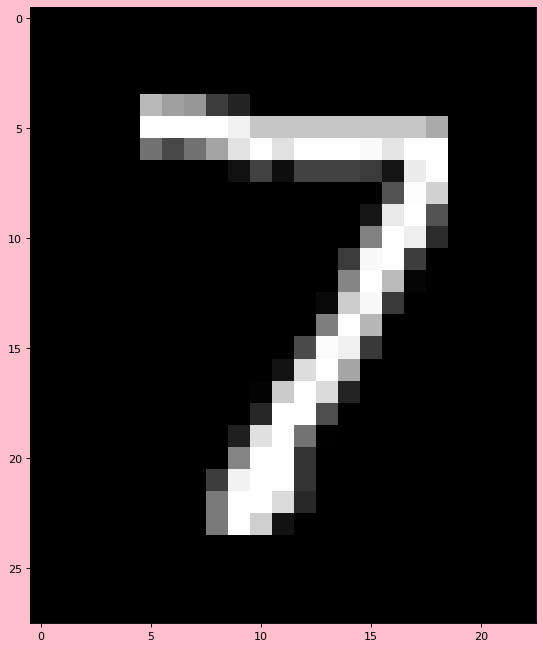

In [24]:
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='pink', edgecolor='k')
plt.imshow(im)
plt.show()

Создание изображения с помощью matplotlib:

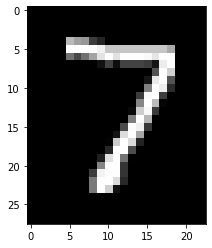

In [112]:
plt.imshow(data, cmap='gray', interpolation='nearest')

Похожим образом можно сиздать текст на цветном фоне встроинными средствами PIL и сохранить его в файл:

In [25]:
text = "Hello, PIL!!!"
color = (0, 0, 120)
img = Image.new('RGB', (100, 50), color)
imgDrawer = ImageDraw.Draw(img)
imgDrawer.text((10, 20), text)
img.save("pil-basic-example.png")

Сделаем обратную операцию, загрузим изображение и выведем его на экран: 

Старейшая сохранившаяся фотография «Вид из окна в Ле Гра». Жозеф Нисефор Ньепс, 1826 год


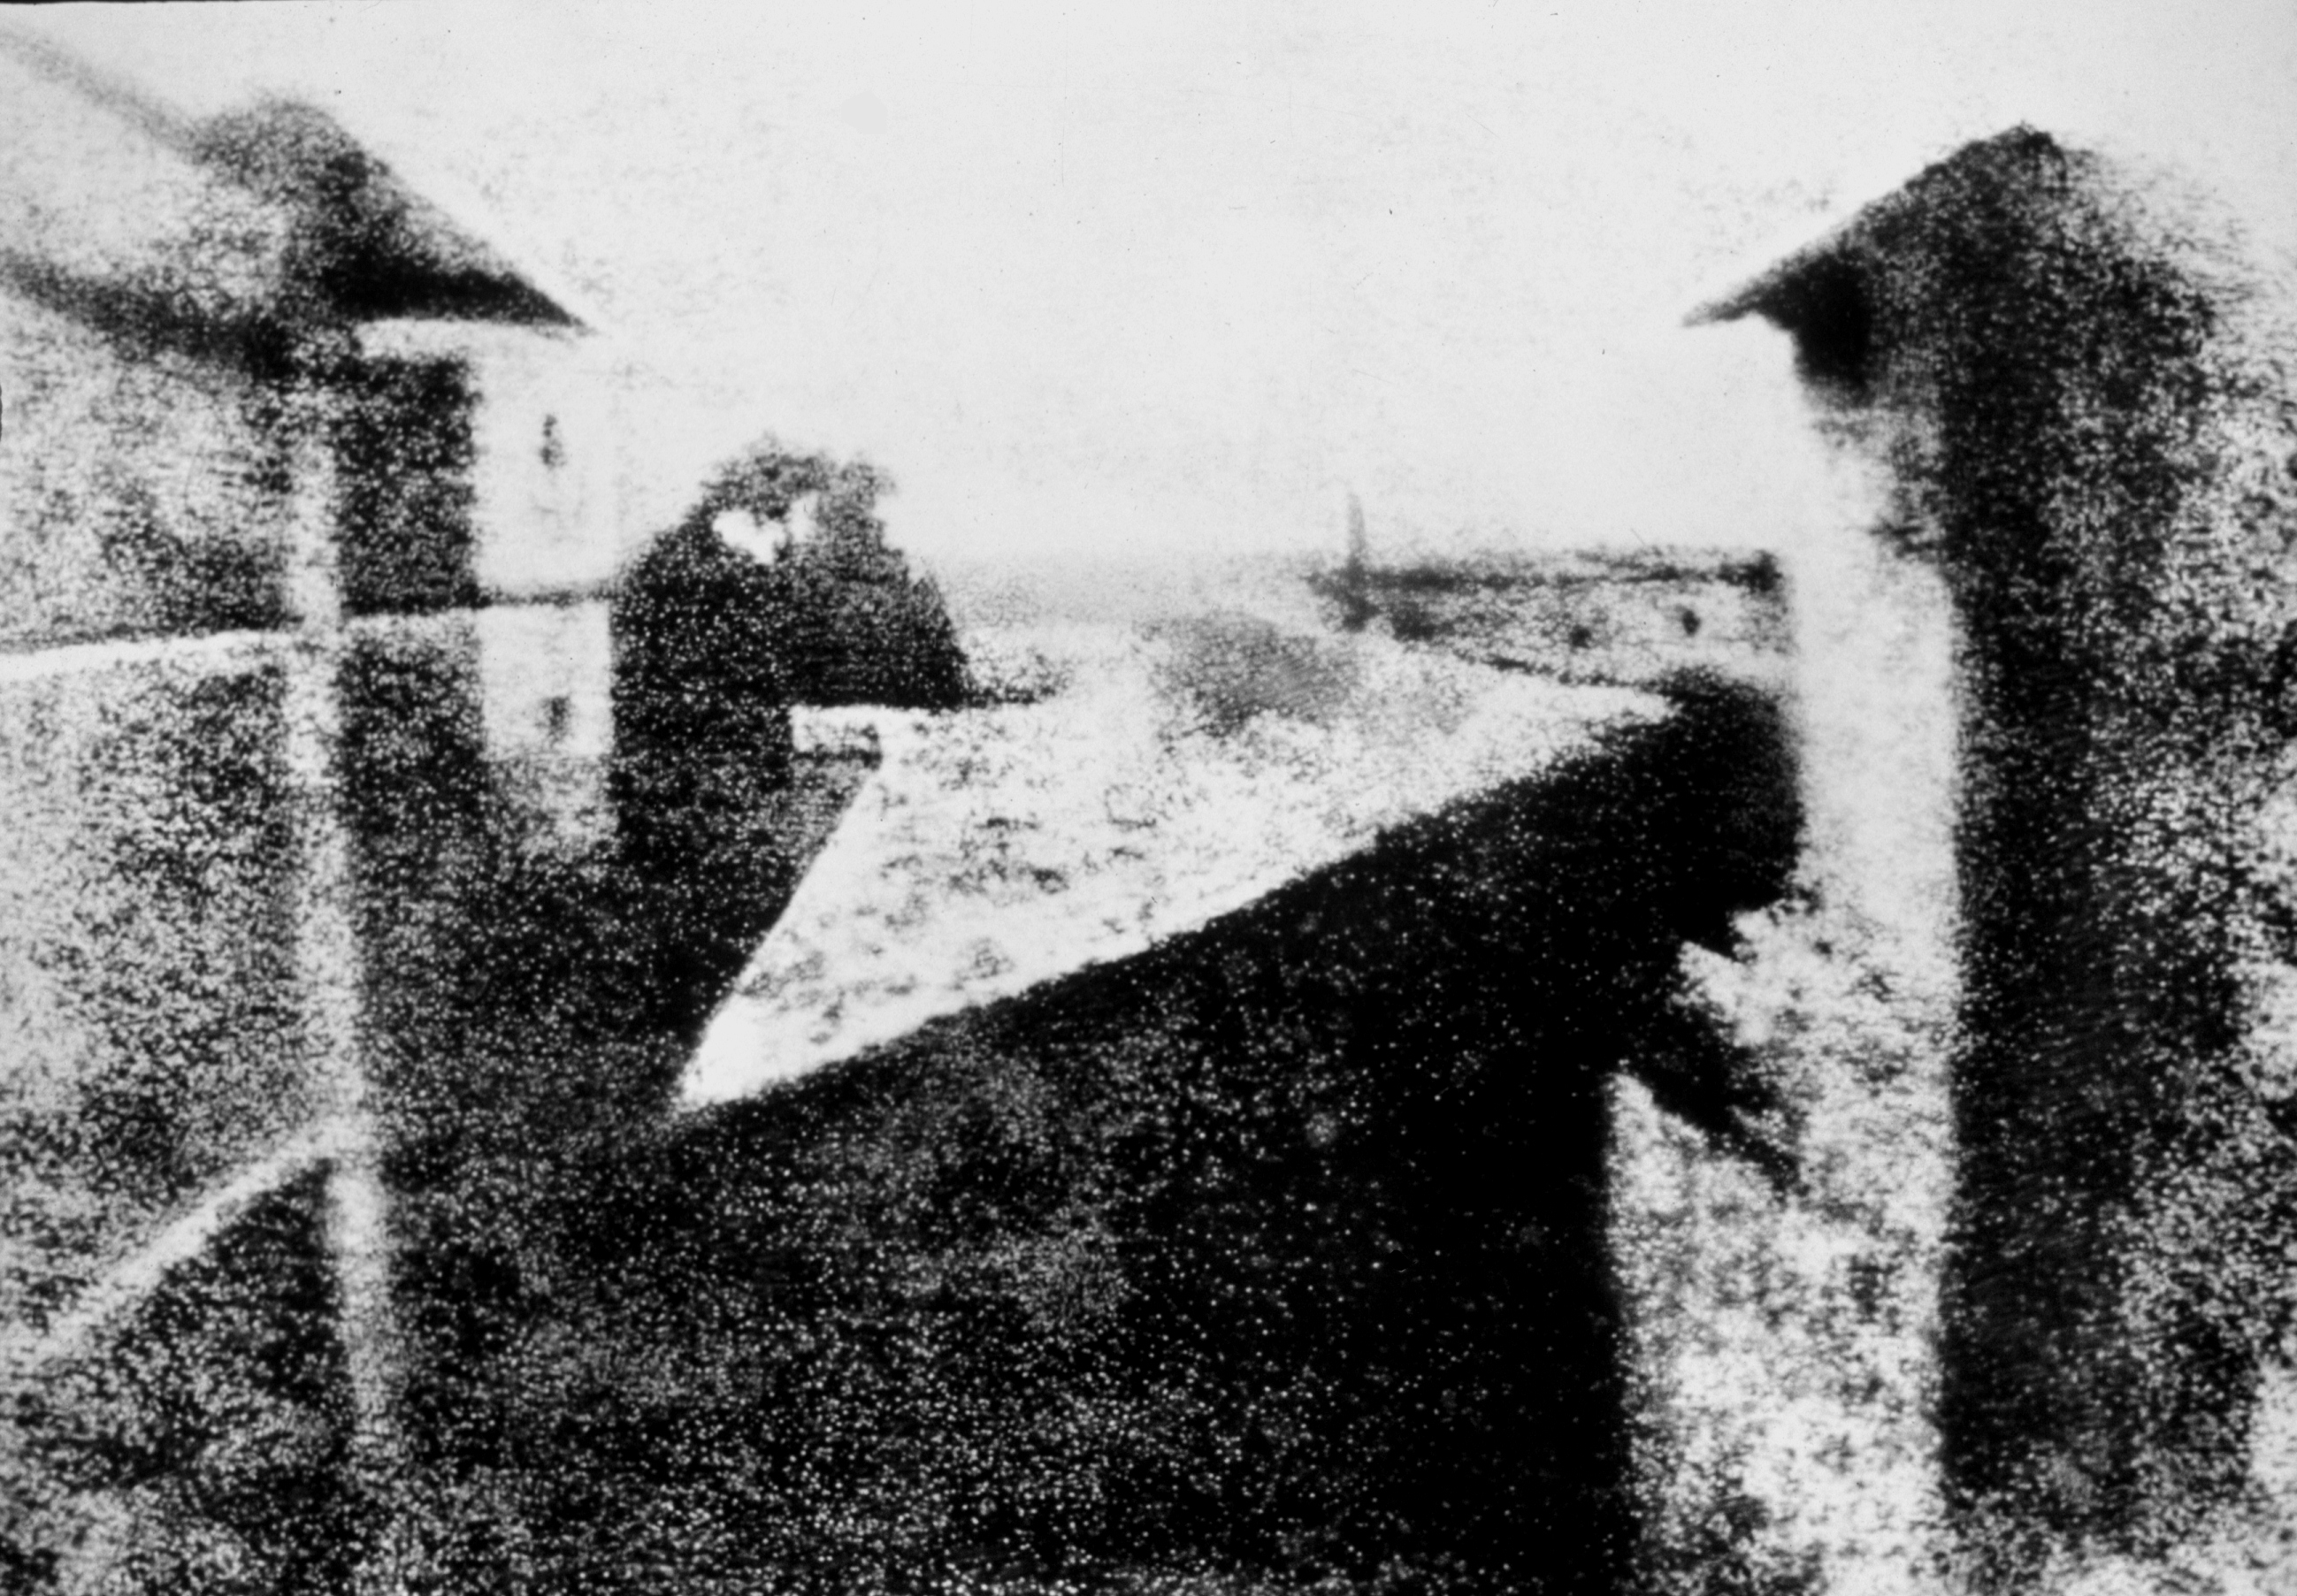

In [166]:
im2 = Image.open("View_from_the_Window_at_Le_Gras_1826.JPG") 
print('Старейшая сохранившаяся фотография «Вид из окна в Ле Гра». Жозеф Нисефор Ньепс, 1826 год')
im2

# Упражнение 2. Манипуляции с изображеними


In [48]:
image = Image.open('Mandalorian3.jpg') # Открываем изображение
draw = ImageDraw.Draw(image)           # Создаем инструмент для рисования
width = image.size[0]                  # Определяем ширину
height = image.size[1]                 # Определяем высоту
pix = image.load()                     # Выгружаем значения пикселей

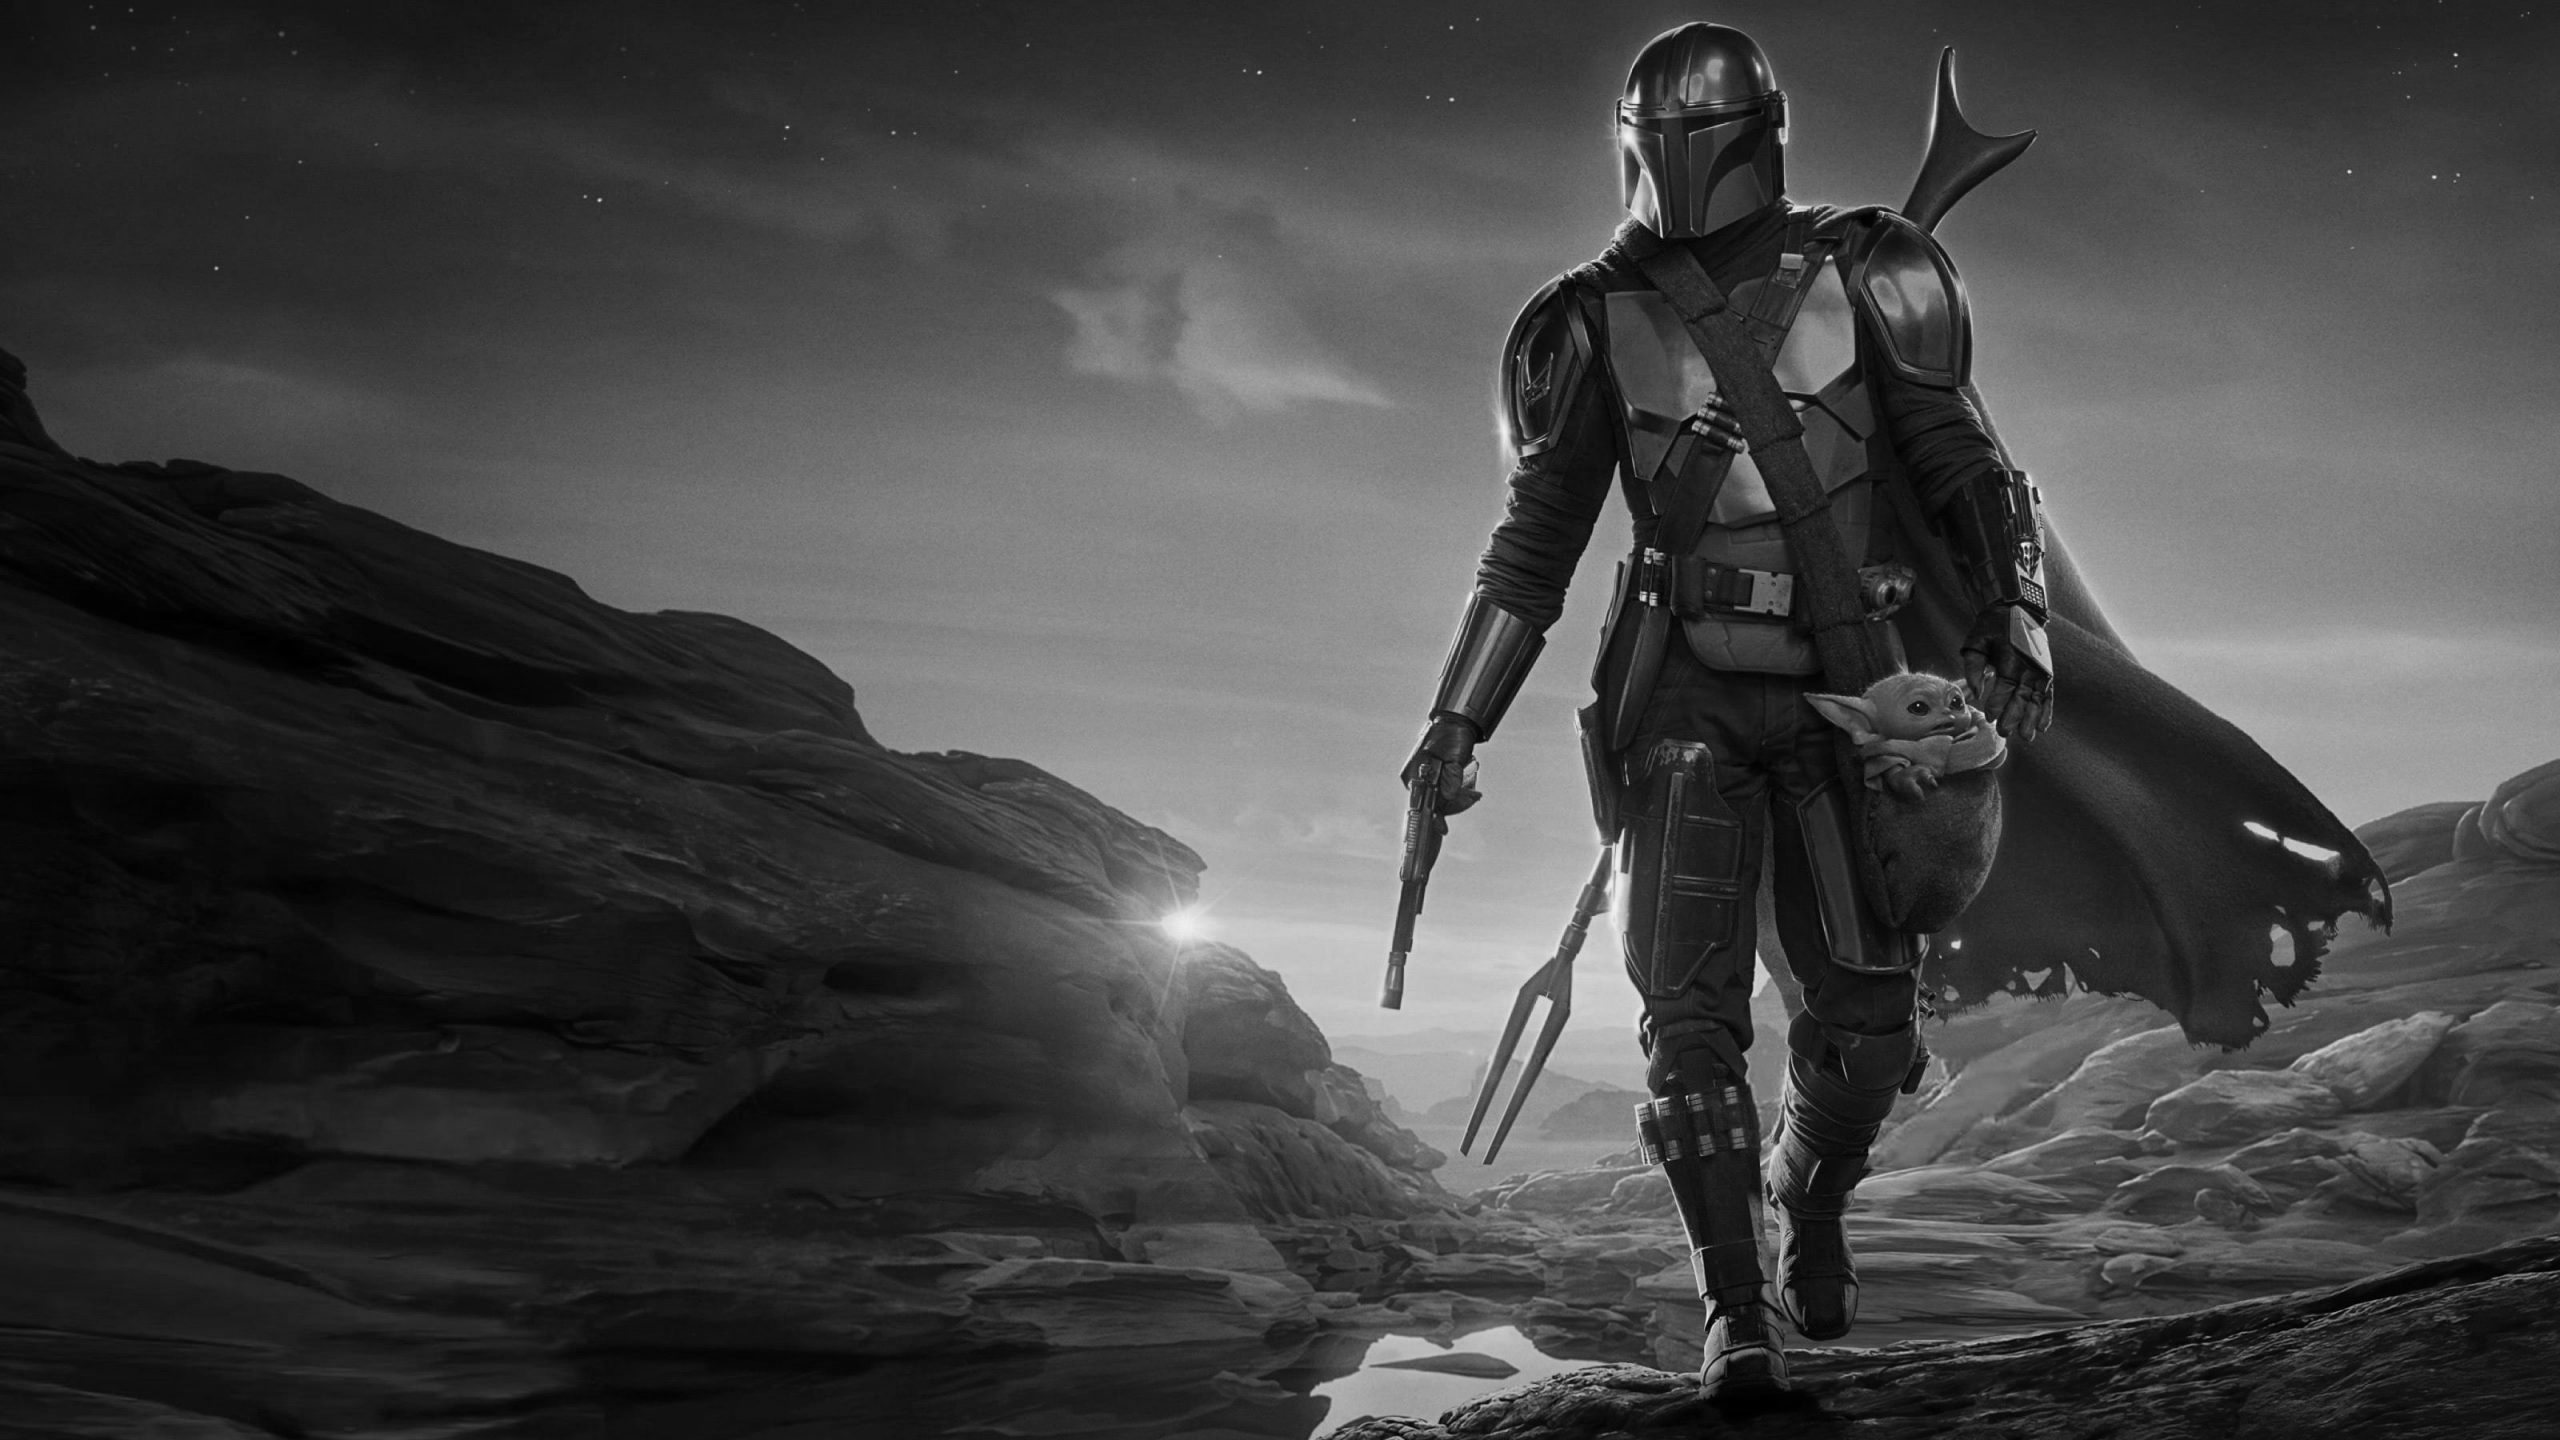

In [32]:
image

Значения пикселя в изображении задаются в формате: (x,y),(red, green, blue), где x,y — координаты, а числовые значения RGB
находятся в диапазоне от 0 до 255. То есть работаем с 8-битным изображением. 

Например

In [29]:
x, y = map(int, input("Какой пиксель интересует (х,у): ").split())
print('Для пикселя ({},{}) значение красного, зелёного и синего цветов равно: {}, {}, {}'.format(x,y,pix[x,y][0],pix[x,y][1],pix[x,y][2]))

Для пикселя (1,2) значение красного, зелёного и синего цветов равно: 0, 17, 33


# 2.1 Оттенки серого

Серый оттенок появляется в случае равенства всех палитр цветов. Получите для каждого пикселя среднее арифметическое значение во всех трёх цветовых каналах и запишите его в них следующим образом:

draw.point((x, y), (sr, sr, sr))

После чего сохраните получившееся изображение

image.save("result.jpg", "JPEG")

In [31]:
for x in range(width):
    for y in range(height):
        sr = (pix[x, y][0] + pix[x, y][1] + pix[x, y][2]) // 3
        draw.point((x, y), (sr, sr, sr))
image.save('result.jpg', 'JPEG')

# 2.2 Инверсия

Инверсия цвета (Invert) нужна для изменения цветов на противоположные. При этом значение яркости изображения изменяется на значение на 256-шаговой шкале значений цвета. 

Например, если значение пикселя составляет — 250, то его противоположность да данному правилу будет — 5. Вы видите как идет замены светлых цветов на темные и наоборот.

Проведите инверсию цвета для предложенного изображения и сохраните результат в файл.

In [33]:
for x in range(width):
    for y in range(height):
        draw.point((x, y), (255 - pix[x, y][0], 255 - pix[x, y][1], 255 - pix[x, y][2]))
image.save('result2.jpg', 'JPEG')

# 2.3 Песчаная буря

Устройте мандалорцу песчаную бурю - добавьте на картинку шум.

Создадим для этого собственное изображение состоящее из белого (серого и цветного) шума.

Например:

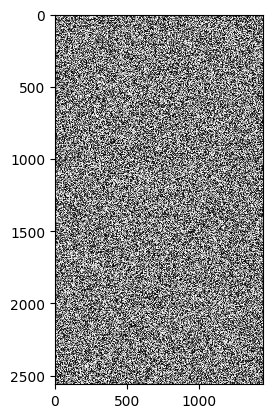

In [50]:
random_image = np.random.random([width, height])
for x in range(width):
    for y in range(height):
        draw.point((x, y), (int(pix[x, y][0] * random_image[x, y]), int(pix[x, y][1] * random_image[x, y]), int(pix[x, y][2] * random_image[x, y])))
image.save('result4.jpg', 'JPEG')
plt.imshow(random_image, cmap='gray', interpolation='nearest')

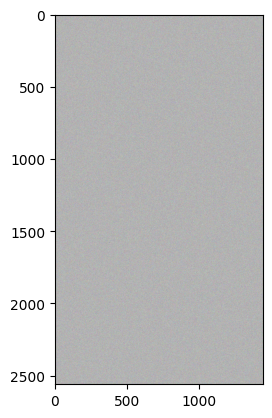

In [49]:
random_image2 = np.random.uniform(0.5, 0.9, (width, height, 3))
for x in range(width):
    for y in range(height):
        draw.point((x, y), (int(pix[x, y][0] * random_image2[x, y][0]), int(pix[x, y][1] * random_image2[x, y][1]), int(pix[x, y][2] * random_image2[x, y][2])))
image.save('result3.jpg', 'JPEG')
plt.imshow(random_image2)

# Структурированные файлы CSV и JSON

CSV (англ. Comma-Separated Values - значения, разделенные запятыми, 2005 г.) - текстовый формат, предназначенный для представления табличных данных. Каждая строка файла - это одна строка таблицы, где значения отдельных колонок разделяются разделительным символом (англ. delimiter) запятой , и заключаются в кавычки ".

В Python работа с CSV-файлами поддерживается стандартным модулем csv.

Организуем чтение файла:

In [1]:
import csv

In [2]:
filename = "Exemple.csv"

rows = []
with open(filename, "r") as f:
    reader = csv.reader(f)
    rows = list(reader)  # reader - итерируемый объект и может быть преобразован в список строк

for row in rows:
    print(row)

['Наименование', 'Вес', 'Цена/кг.']
['манго"', '3', '250']
['морковь"', '1', '35']
['яблоки"', '2', '100']
['рис"', '4', '70']


In [193]:
rowp = input('Есть что добавить в список покупок: ')

if 'Нет' not in rowp and 'нет' not in rowp:
    rowp = rowp.split()
    rows.append(rowp)
    
# Запись в файл
with open(filename, "w", newline="") as f:
    writer = csv.writer(f, quoting=csv.QUOTE_ALL)
    for row in rows:
        writer.writerow(row)

Есть что добавить в список покупок: арбуз 6 30


JSON (англ. JavaScript Object Notation, 1999 г.) - текстовый формат обмена данными, основанный на JavaScript. Одно из преимуществ - JSON легко читается людьми (англ. human-readable) 

In [194]:
import json

In [197]:
filename = "Exemple2.json"

info = {
    "ФИО": "Иванов Сергей Михайлович",
    "ЕГЭ": {
        "Математика": 90,
        "Физика": 70,
        "Информатика": 80
    },
    "Хобби": ["Рисование", "Плавание"],
    "Возраст": 25.5,
    "ДомЖивотные": None
}

# Запись структуры в файл в JSON-формате
with open(filename, "w") as fh:
    fh.write(json.dumps(info, ensure_ascii=False, indent=4))


In [198]:
# Чтение из файла JSON-формата
info_2 = []
with open(filename) as fh:
    info_2 = json.loads(fh.read())

print(info_2)

{'ФИО': 'Иванов Сергей Михайлович', 'ЕГЭ': {'Математика': 90, 'Физика': 70, 'Информатика': 80}, 'Хобби': ['Рисование', 'Плавание'], 'Возраст': 25.5, 'ДомЖивотные': None}


In [201]:
print(info_2['ФИО'])
print(info_2['ЕГЭ'])
print(info_2['Хобби'])
print(info_2['Возраст'])
print(info_2['ДомЖивотные'])

Иванов Сергей Михайлович
{'Математика': 90, 'Физика': 70, 'Информатика': 80}
['Рисование', 'Плавание']
25.5
None


# Функции для работы с каталогами.

Часто полезно зная путь к папке с файлами (каталог) уметь узнать содержание папки и наличие в ней необходимого файла. Эти операции можно делать с помощью модуля (библиотеки) работы с системой:

In [4]:
import os

Определение текущего рабочего каталога. 

От значения, возвращаемого этой функцией, зависит преобразование относительного пути в абсолютный. Кроме того, важно помнить, что текущим рабочим каталогом будет каталог, из которого запускается файл, а не каталог с исполняемым файлом:

In [5]:
os.getcwd()

'c:\\Users\\newak\\OneDrive\\Desktop\\labs\\Laba 6'

Получение список объектов в указанном каталоге

In [7]:
os.listdir('c:\\Users\\newak\\OneDrive\\Desktop\\labs\\Laba 6')

['data1.txt',
 'data2.txt',
 'Exemple.csv',
 'Exemple.json',
 'Exemple2.json',
 'file.txt',
 'Laba 6.ipynb',
 'Mandalorian3.jpg',
 'pil-basic-example.png',
 'result.jpg',
 'result2.jpg',
 'result3.jpg',
 'result4.jpg',
 'Seven.bin',
 'Seven.txt',
 'table.dat',
 'View_from_the_Window_at_Le_Gras_1826.jpg']

Обход дерева каталогов

В качестве значения функция walk о возвращает объект. На каждой итерации через этот объект доступен кортеж из трех элементов: текущего каталога, списка каталогов и списка файлов, находящихся в нем. Если произвести изменения в списке каталогов во время выполнения, это позволит изменить порядок обхода вложенных каталогов.

In [10]:
for (p, d, f) in os.walk('c:\\Users\\newak\\OneDrive\\Desktop\\labs'): 
    print(p, d, f)

c:\Users\newak\OneDrive\Desktop\labs ['.git', 'Laba 6'] ['Laba 1 done.ipynb', 'Laba 10.ipynb', 'Laba 11.ipynb', 'Laba 12.ipynb', 'Laba 13.ipynb', 'Laba 2 done.ipynb', 'Laba 3 done.ipynb', 'Laba 4 done.ipynb', 'Laba 5 done.ipynb', 'Laba 7.ipynb', 'Laba 8 done.ipynb', 'Laba 9.ipynb', 'pi-10million.txt']
c:\Users\newak\OneDrive\Desktop\labs\.git ['hooks', 'info', 'logs', 'objects', 'refs'] ['COMMIT_EDITMSG', 'config', 'description', 'HEAD', 'index']
c:\Users\newak\OneDrive\Desktop\labs\.git\hooks [] ['applypatch-msg.sample', 'commit-msg.sample', 'fsmonitor-watchman.sample', 'post-update.sample', 'pre-applypatch.sample', 'pre-commit.sample', 'pre-merge-commit.sample', 'pre-push.sample', 'pre-rebase.sample', 'pre-receive.sample', 'prepare-commit-msg.sample', 'push-to-checkout.sample', 'sendemail-validate.sample', 'update.sample']
c:\Users\newak\OneDrive\Desktop\labs\.git\info [] ['exclude']
c:\Users\newak\OneDrive\Desktop\labs\.git\logs ['refs'] ['HEAD']
c:\Users\newak\OneDrive\Desktop\labs

# Упражнение 3.

На системном диске есть папки с именем Temp (например C:\Windows\Temp), она нужна для хранения временных файлов системы. Найдите одну из таких папок и оприделите файлы каких типов данных там есть. 

In [18]:
import os

for (p, d, f) in os.walk('C:\\'):
    if 'Labaratornaya_nomer_6' in d:
        for (p1, d1, f1) in os.walk(p + '\\' + 'Labaratornaya_nomer_6'):
            print('Папки: ')
            for folder in d1:
                print(folder, end=' ')
            print('\n')
            print('Файлы типов: ')
            for item in f1:
                print(item.split('.')[-1], end=' ')
            break
        break

Папки: 
Папка 

Файлы типов: 
txt 

# Домашнее задание (базовое):

# Задание 1
С клавиатуры в одной строке вводится произвольное количество вещественных чисел. Запишите их в файл, расположив каждое число на отдельной строке.
Полученный таким образом файл, нужно считать, загрузите список чисел, вычислите их сумму, максимум и минимум, дописать эти значения в конец файла.

Выполните программу несколько раз, убедитесь, что новые значения учитываются при подсчете.

Если файл прочитать не удается, программа должна прекратить чтение и сообщить об этом пользователю.

In [35]:
floats = input('Введите вещественные числа через пробел').split()
with open('task1.txt', 'a') as file:
    for i in floats:
        if not set(i) <= set('0123456789.'):
            print(f'Подожди ка! А вот {i} вообще-то не вещественное число!')
            print('Ах ты! Запорол такую операцию! Ну что теперь, удаляй файл, раз накосячил')
            break
        file.write(i + '\n')

In [22]:
del floats

In [36]:
read_info = []
try:
    with open('task1.txt', 'r') as file:
        for i in file.readlines():
            i = i.strip()
            if set(i) <= set('0123456789.'):
                read_info.append(float(i)) 
except:
    print('Файл не был найден!')

print(f'Сумма всех считанных чисел: {sum(read_info)}')
print(read_info)

Сумма всех считанных чисел: 9337.542800000001
[1.2, 24.4, 421.32, 5.4214, 4213.31, 0.0, 3.12, 1.2, 24.4, 421.32, 5.4214, 4213.31, 0.0, 3.12]


# Задание 2
Измените предыдущую задачу так, чтобы пользователь мог вводить любые символы, а программа записывала бы их в файл. Происходить это должно в цикле несколько раз, и новые данные должны дописываться в файл. После чего вне зависимости от ошибок чтения файла, программа должна выполнять подсчет суммы, максимума и минимума. И дописать эти значения в конец файла.

In [41]:
floats = input('Введите вещественные числа через пробел').split()
with open('task2.txt', 'a') as file:
    for i in floats:
        if not set(i) <= set('0123456789.'):
            continue
        file.write(i + '\n')

In [42]:
del floats

In [43]:
read_info = []
try:
    with open('task2.txt', 'r') as file:
        for i in file.readlines():
            i = i.strip()
            if set(i) <= set('0123456789.'):
                read_info.append(float(i)) 
except:
    print('Файл не был найден!')

print(f'Сумма всех считанных чисел: {sum(read_info)}')
print(read_info)

Сумма всех считанных чисел: 9371.642800000001
[1.2, 24.3, 421.32, 5.4214, 4213.31, 0.0, 3.12, 1.2, 24.4, 421.32, 5.4214, 4213.31, 0.0, 3.12, 1.0, 3.0, 1.1, 5.0, 1.0, 3.0, 1.1, 5.0, 9.0, 5.0]


# Задание 3
Информация о занятости мест в зрительном зале кинотеатра хранится в текстовом файле. Например:

где строка обозначает ряд, столбец - место (0 - свободно, 1 - занято).

Напишите программу, которая позволит пользователю увидеть количество свободных мест, общее число мест в зале, число свободных мест в зале и в каждом ряду, а также, введя номер ряда и места, получить информацию - свободно оно или нет.

In [4]:
cnt_free = 0
cnt_reserved = 0
cnts_for_rows = []
reservation_dict = dict()

try:
    with open('data_for_task3.txt', 'r') as file:
        lines = [i.strip() for i in file.readlines()]
        for row_index, row_info in enumerate(lines):
            for col_index, col_info in enumerate(row_info.split()):
                if col_info == '0':
                    cnt_free += 1
                    if row_index in reservation_dict:
                        reservation_dict[row_index][col_index] = False
                    else:
                        reservation_dict[row_index] = {col_index: False}
                elif col_info == '1':
                    cnt_reserved += 1
                    if row_index in reservation_dict:
                        reservation_dict[row_index][col_index] = True
                    else:
                        reservation_dict[row_index] = {col_index: True}
    
    cnt_general = cnt_free + cnt_reserved
    print('Добро пожаловать в наш кинотеатр!', f'Успейте купить билеты, ведь всего осталось свободно {cnt_free} мест!',
          f'Вы удивитесь, но ровно {cnt_reserved} человек точно как и вы захотели посмотреть этот фильм!',
          f'Да! Вы правильно поняли! У нас в кинотеатре ровно {cnt_general} мест! Мы уверены, вам понравится!', sep='\n')
    print('-ммм... Здравствуйте... Я... я ... я хотел бы... нуу, я хотел бы купить место наа ряду номер.... ')
    row = int(input('\nряд номер: ')) - 1
    print('Замечательно! А какое место вы бы хотели??')
    print('-нууу, а что насчет..... места номер ...')
    col = int(input('\nместо номер: ')) - 1
    try:
        print(f'Место {col+1} на ряду {row+1} {"свободно, но стоит оно 10999 рублей" if reservation_dict[row][col] else "занято"}')
    except:
        print(f'Место {col+1} на ряду {row+1} не существует как бы')
    finally:
        print('Может быть другое место?')
        print('-Нее, я лучше.... я лучше пойду....')
except:
    print('Ошибка чтения файла')


Добро пожаловать в наш кинотеатр!
Успейте купить билеты, ведь всего осталось свободно 6 мест!
Вы удивитесь, но ровно 7 человек точно как и вы захотели посмотреть этот фильм!
Да! Вы правильно поняли! У нас в кинотеатре ровно 13 мест! Мы уверены, вам понравится!
-ммм... Здравствуйте... Я... я ... я хотел бы... нуу, я хотел бы купить место наа ряду номер.... 
Замечательно! А какое место вы бы хотели??
-нууу, а что насчет..... места номер ...
Место 3 на ряду 1 свободно, но стоит оно 10999 рублей
Может быть другое место?
-Нее, я лучше.... я лучше пойду....


# Задание 4. Файлы прямого доступа. 

Напишите программу, вычисляющую произведение матриц. При этом исходные матрицы и матрица продукт находятся в файлах, в программе может храниться только по одному элементу каждой из матриц. После проведения расчётов выведите результат в виде:

In [5]:
n1, n2, m1, m2 = 3, 3, 3, 3  # при изменении файлов matrix1.txt и matrix2.txt настоятельно требуется изменить вручную эти данные. 
# m1 - это количество строк в первой матрице, n1 - столбцов. Аналогично со второй матрицей

new_elem_flag = True
curr_summands_count = 0
new_row_flag = False
curr_elems_in_a_row = 0
curr_seek = 0

with open('matrix_res.txt', 'w') as f:
    pass

for i in range(m1*n2*n1):
    with open('matrix1.txt', 'r') as matrix1:
        curr_el_1 = int([i.strip().split() for i in matrix1.readlines()][i//(n2*n1)][i%n1])
        with open('matrix2.txt', 'r') as matrix2:
            curr_el_2 = int([i.strip().split() for i in matrix2.readlines()][i%m2][(i//m2)%n2])
            with open('matrix_res.txt', 'r+') as matrix_result:
                if new_row_flag:
                    matrix_result.seek(curr_seek)
                    matrix_result.write('\n')
                    curr_seek += 1
                    new_row_flag = False

                if new_elem_flag:
                    matrix_result.seek(curr_seek)
                    matrix_result.write(' ')
                    curr_seek += 1
                    matrix_result.write(str(curr_el_1 * curr_el_2))
                    curr_summands_count += 1
                    new_elem_flag = False
                else:
                    curr_res_el = [i.strip().split() for i in matrix_result.readlines()][-1][-1]
                    matrix_result.seek(curr_seek, 0)
                    matrix_result.write(str(int(curr_res_el) + curr_el_2*curr_el_1))
                    curr_summands_count += 1

                if curr_summands_count == n1:
                    new_elem_flag = True
                    curr_summands_count = 0
                    curr_elems_in_a_row += 1
                    curr_seek += len(str(int(curr_res_el) + curr_el_2*curr_el_1))

                if curr_elems_in_a_row == m1:
                    new_row_flag = True
                    curr_elems_in_a_row = 0
 

# Программа может работать с любыми размерами матриц, но форматированный вывод работает только для 3*3 х 3*3
if n1 == n2 == m1 == m2 == 3:
    with open('matrix1.txt', 'r') as mat1:
        with open('matrix2.txt', 'r') as mat2:
            with open('matrix_res.txt', 'r') as mat_res:
                mat1_read = mat1.readlines()
                mat2_read = mat2.readlines()
                matres_read = mat_res.readlines()
                for i in range(max(m1, m2, n1, n2)):
                    if i < m1 and i < m2:
                        if i == m1 // 2:
                            print(f'{mat1_read[i].strip():5s}   X   {mat2_read[i].strip():5s}   =   {matres_read[i].strip()}')
                            continue
                        print(f'{mat1_read[i].strip():5s}       {mat2_read[i].strip():5s}       {matres_read[i].strip()}')
                    elif i < m1:
                        print(f'{mat1_read[i].strip():10f} {matres_read[i].strip()}')

1 2 1       1 0 0       1 3 1
1 2 0   X   0 1 0   =   1 2 0
2 1 1       0 1 1       2 2 1


# Задание 5. 

Напишите программу которая ищет по имени на компьютере этот файл с лабораторной работой и выводит полный (абсолютный) путь до него.

In [8]:
import os

In [13]:
for (p, d, f) in os.walk('C:\\'):
    if 'Laba 6.ipynb' in f:
        print(p + '\Laba 6.ipynb')
        break

C:\Users\newak\OneDrive\Desktop\labs\Laba 6\Laba 6.ipynb


# Домашнее задание (дополнительное):

# Задание. Имя EXE.

В операционной системе MS-DOS первые два байта ЕХЕ-файлов равны 0100110101011010. Это инициалы "MZ" создателя ЕХЕ-формата Марка Збиковски (Mark Zbikowski). Напишите функцию, проверяющую эти байты у файла, заданного ее аргументом, и возвращающую 1, если это ЕХЕ-файл, и 0 в противном случае.

In [29]:
def is_exe(filename):
    try:
        with open(filename, 'rb') as file:
            signature = file.read(2)
            return int(signature == b'MZ')
    except:
        return 'Файл не был найден'


filename = 'Setup.exe'
print(is_exe(filename))

1


# Задание. «Ctrl-C»
Напишите программу копирующую файл «ИмяФайла» не производя чтения его содержимого (т.е. без привязке к его содержимомому или какой либо иной интерпритации хранящийся там информации) в файл «Copy ИмяФайла».

In [32]:
import shutil

def copy_file(filename_from, filename_to):
    shutil.copyfile(filename_from, filename_to)


with open('ИмяФайла', 'w') as f1:
    f1.write("WHEN THE SUN SHINES WE'LL SHINE TOGETHER\nOST Rihanna")

with open('Copy ИмяФайла', 'w'):
    pass

filename_from = 'ИмяФайла'
filename_to = 'Copy ИмяФайла'
copy_file(filename_from, filename_to)

# Задание. Телефонный справочник.

Дан телефонный справочник в формате JSON:

Программа должна позволять (предоставлять функции):
1. загружать информацию из справочника;
2. выполнять поиск контактов по номеру телефона;
3. выполнять поиск контактов по имени;
4. добавлять контакт;
5. удалять контакты по имени;
6. удалять номер телефона из контактов;
7. сохранять справочник в файл.

In [2]:
import json

In [17]:
filename = "Contacts.json"

info = [
    {
       "имя":"Петр Петрович",
       "телефоны":[
          {
             "описание":"МТС",
             "номер":"+79158464523"
          },
          {
             "описание":"Теле-2",
             "номер":"+79804532534"
          }
       ]
    },
    {
        "имя":"Иван Алексеев",
        "телефоны":[
           {
              "описание":"Билайн",
              "номер":"+79992341244"
           },
           {
              "описание":"Vodafone Nederland",
              "номер":"+319452345"
           }
        ]
    }
]


# Запись структуры в файл в JSON-формате
with open(filename, "w") as fh:
    fh.write(json.dumps(info, ensure_ascii=False, indent=4))

In [38]:
contacts = []
with open('Contacts.json') as fh:
    contacts = json.loads(fh.read())


choice = input('Введите то, что вы хотите от программы:\n1. загружать информацию из справочника;\n2. выполнять поиск контактов по номеру телефона;\n3. выполнять поиск контактов по имени;\n4. добавлять контакт;\n5. удалять контакты по имени;\n6. удалять номер телефона из контактов;\n7. сохранять справочник в файл.\nВаш выбор: ')
match choice:
    case '1':
        print('Информация из справочника представлена ниже:')
        print(contacts)
    case '2':
        telephone = input('Введите номер телефона, начиная с символа "+" (можно использовать пробелы и тире): ')
        for symb in '-_ ':
            telephone = telephone.replace(symb, '')
        for man in contacts:
            for phone in man['телефоны']:
                if phone['номер'] == telephone:
                    print(f'Номер {telephone} является номером абонента {man["имя"]}. Оператор сотовой связи: {phone["описание"]}')
                    break
            else:
                continue
            break
        else:
            print('Такого телефона пока что нет в нашей базе')
    case '3':
        name = input('Введите имя: ')
        names = []
        for man in contacts:
            if man['имя'] == name:
                names.append(man)
        if not names:
            print('В базе не было найдено пользователей с таким именем')
        else:
            print(f'Количество совпадений с базой: {len(names)}')
            cnt = 0
            for man in names:
                print(f'{cnt+1}. {man["имя"]}, номера телефонов:')
                for phone in man['телефоны']:
                    print(f'-{phone["описание"]}: {phone["номер"]}')
                cnt += 1
    case '4':
        contact_info = {'имя': None, 'телефоны': []}
        name = input('Введите имя контакта: ')
        contact_info['имя'] = name
        cnt_nums = input('Введите количество номеров телефона этого контакта, сколькими вы располагаете: ')
        if not set(cnt_nums) <= set('0123456789'):
            raise ValueError('Число номеров телефона контакта должно быть целым')
        cnt_nums = int(cnt_nums)

        for _ in range(cnt_nums):
            phone = {'описание': None, 'номер': None}
            descr = input('Введите оператора сотовой связи: ')
            number = input('Введите номер телефона (заметьте, что номер должен начинаться с + и не должен содержать посторонние символы): ')
            if not set(number) <= set('0123456789+'):
                raise ValueError('Мы вас предупреждали о правилах заполнения номера телефона')
            phone['описание'], phone['номер'] = descr, number
            contact_info['телефоны'].append(phone)
        
        contacts.append(contact_info)
        print('Контакт был успешно добавлен')
    case '5':
        name = input('Введите имя пользователя, чей контакт вы хотите удалить (имейте в виду, что произойдет удаление всех пользователей, чье имя будет схоже с тем, что вы написали): ')
        indexes = []
        for ind, man in enumerate(contacts):
            if man['имя'] == name:
                indexes.append(ind)
        if not indexes:
            print('Пользователей с таким именем не было найдено')
        else:
            cnt = 0
            if len(indexes) == 1:
                print(f'Контакт {name} был успешно удален')
                del contacts[indexes[0]]
            else:
                for i in indexes[::-1]:
                    cnt += 1
                    print(f'{cnt}. Контакт {name} был успешно удален')
                    del contacts[i]
            print('Удаление завершено')
    case '6':
        phone_del = input('Введите номер телефона, который вы бы хотели удалить (допускается вводить пробелы, тире и нижние подчеркивания для удобства записи): ')
        for symb in ' _-':
            phone_del = phone_del.replace(symb, '')
        for man in contacts:
            for ind, phone in enumerate(man['телефоны']):
                if phone['номер'] == phone_del:
                    print(f'-Телефон {phone_del} оператора {phone["описание"]}, который принадлежал абоненту {man["имя"]} был успешно удален')
                    del man['телефоны'][ind]
                    break
        print(f'В базе данных больше не осталось информации про номер {phone_del}')
    case '7':
        print(f'Справочник успешно сохранен в файл {filename}')
        with open(filename, "w") as fh:
            fh.write(json.dumps(contacts, ensure_ascii=False, indent=4))

Информация из справочника представлена ниже:
[{'имя': 'Петр Петрович', 'телефоны': [{'описание': 'МТС', 'номер': '+79158464523'}, {'описание': 'Теле-2', 'номер': '+79804532534'}]}, {'имя': 'Иван Алексеев', 'телефоны': [{'описание': 'Билайн', 'номер': '+79992341244'}, {'описание': 'Vodafone Nederland', 'номер': '+319452345'}]}, {'имя': 'Добрин Сергей', 'телефоны': [{'описание': 'МТС', 'номер': '+79158461424'}, {'описание': 'Билайн', 'номер': '+79807348104'}]}]
